## QR factorization

### Why do we care?

- QR factorization gives a better way to find least square solution.
- It is used to compute eigenvalues. (a future topic)
- It gives a direct method to solve system of linear equations. (But not as efficient as LU)

### Gram-Schmidt orthogonalization

#### Overview

##### Problem of interest

**Problem of interes**

Given linearly independent vectors $A_1, \cdots, A_n \in\mathbb{R}^m$ ($n\le m$) find orthonormal vectors $q_1, \cdots, q_n \in\mathbb{R}^m$ that span the same space as $A_1, \cdots, A_n$ do. 

#### Notation and settings

- Switch back and forth between column and row vector depending on convenience of writing/typing. Ask anytime when there is any confusion due to this.

#### What we can do

##### Idea

**Idea**: Recursively subtract out perpendicular components.

**Example** 

Find orthonormal vectors that span the same space as 
$$
A_1 = (1,-1,1)^T,
A_2 = (1,0,1)^T,
A_3 = (1,1,2)^T
$$

**TBA**: CalcPlot3D desired

$$
\begin{aligned}
y_1 &= A_1=(1,-1,1)
\\
q_1 &= \frac{y_1}{\left\|y_1\right\|_2} 
= \frac{1}{\sqrt{3}} \left(1, -1, 1\right)
\end{aligned}
$$

$$
\begin{aligned}
y_2 &= A_2-q_1\left(q_1^T A_2\right)  =(1,0,1)-\frac{2}{3}(1,-1,1) =\left(\frac{1}{3}, \frac{2}{3}, \frac{1}{3}\right)
\\
q_2 &= \frac{y_2}{\left\|y_2\right\|_2} = \frac{1}{\sqrt{6}} (1, 2, 1)
\end{aligned}
$$


$$
\begin{aligned}
y_3 &= A_3-q_1\left(q_1^T A_3\right) -q_2\left(q_2^T A_3\right) 
    \\
& =(1,1,2)-\frac{2}{3}(1,-1,1)-\frac{5}{6}\left(1, 2, 1\right) 
    \\
& =\left(\frac{-1}{2}, 0, \frac{1}{2}\right)
    \\
q_3 &= \frac{y_3}{\left\|y_3\right\|_2} = \frac{1}{\sqrt{2}} \left(-1, 0, 1\right)
\end{aligned}
$$

Orthogonal system

$$
\{y_1, y_2, y_3\}=\left\{ (1,-1,1),
\left(\frac{1}{3}, \frac{2}{3}, \frac{1}{3}\right),
\left(\frac{-1}{2}, 0, \frac{1}{2}\right) \right\}
$$

Orthonormal system

$$
\{q_1, q_2, q_3\}=\left\{\left(\frac{\sqrt{3}}{3}, \frac{-\sqrt{3}}{3}, \frac{\sqrt{3}}{3}\right),
\left(\frac{\sqrt{6}}{6}, \frac{\sqrt{6}}{3}, \frac{\sqrt{6}}{6}\right),
\left(\frac{-\sqrt{2}}{2}, 0, \frac{\sqrt{2}}{2}\right) \right\}
$$

**General case**

$$
y_1=A_1
\quad \text { and } \quad 
q_1 = \frac{y_1}{\left\|y_1\right\|_2} 
$$

$$
y_2=A_2-q_1\left(q_1^T A_2\right)  
\quad \text { and } \quad 
q_2=\frac{y_2}{\left\|y_2\right\|_2}
$$

$$
y_j=A_j-q_1\left(q_1^T A_j\right)-q_2\left(q_2^T A_j\right)-\ldots-q_{j-1}\left(q_{j-1}^T A_j\right) \quad \text { and } \quad q_j=\frac{y_j}{\left\|y_j\right\|_2}
$$

### Reduced QR factorization

#### Idea

**Idea**: Reorganize Gram-Schmidt

**Notation** 

- $\hat Q$, $\hat R$: matrices of reduced QR factorization
- $Q$, $R$: matrices of full QR factorization (see the next section)

1. Notice Gram-Schmidt can be **rearranged for $A_j$'s**

$$
\begin{aligned}
A_1 &= r_{11} q_1 \\
A_2 &= r_{12} q_1+r_{22} q_2\\
&\vdots \\
A_j &= r_{1 j} q_1+\cdots+r_{j-1, j} q_{j-1}+r_{j j} q_j
\end{aligned}
$$

2. Recall **linear combinations** of same set of vectors can be expressed as a **matrix multiplication**.

$$
\underbrace{\left(A_1|\cdots| A_n\right)}_{A}
=
\underbrace{\left(q_1|\cdots| q_n\right)}_{\hat Q}
\underbrace{
\left[\begin{array}{cccc}
r_{11} & r_{12} & \cdots & r_{1 n} \\
& r_{22} & \cdots & r_{2 n} \\
& & \ddots & \vdots \\
& & & r_{n n}
\end{array}\right]
}_{\hat R}
$$

#### Summary

- $A$: starting point
  - Size: $m\times n$ $(m\ge n)$
- $\hat Q$: main product
  - Size: $m\times n$ $(m\ge n)$ (same as $A$)
  - Each column is of unit length (in 2-norm).
  - Each pair of columns are orthogonal.
- $\hat R$: by-product
  - Size: $n\times n$
  - Shape: upper triangular
  - non-zero diagonals if $A_j$'s are linearly independent

#### Algorithm


##### QR factorization algorithm using classical Gram-Schmidt


Given $A_j$ ($j=1,\cdots,n$) that are linearly independent

- **for** $j=1,2, \ldots, n$
  - $y=A_j$
  - **for** $i=1,2, \ldots, j-1$
    - $r_{i j}=q_i^T A_j$
    - $y=y-r_{i j} q_i$
  - $r_{j j}=\|y\|_2$
  - $q_j=y / r_{j j}$

##### QR factorization algorithm using modified Gram-Schmidt

Given $A_j, j=1, \ldots, n$ be linearly independent vectors.

- **for** $j=1,2, \ldots, n$
  - $y=A_j$
  - **for** $i=1,2, \ldots, j-1$
    - $r_{i j}=q_i^T y$
    - $y=y-r_{i j} q_i$
  - $r_{j j}=\|y\|_2$
  - $q_j=y / r_{j j}$

**Remark** 

- Difference from the original Gram-Schmidt
  - $r_{i j}=q_i^T A_j$ $\gets$ $r_{i j}=q_i^T y$
  - That is, when $q_i$ component is substracted from $A_j$, we dot-product $q_i$ with $A_j - r_{1j}q_1 - r_{2j}q_2 - \cdots - r_{i-1,j}q_{i-1}$ (most recent, trimmed vector) instead of with the whole vector $A_j$.
  - They are mathematically equivalent (due to orthogonality of $q_j$'s), but the modified one is known to show more accuracy. (Sauer (2017) p. 227)

#### Example

**Example** (Gram-Schmidt via manual QR)

Find the **reduced** QR factorization of the following matrix on computers. Use the result to give the answers to a mathematical question: Give an orthogonal system (not necessarily unit length) of vectors that spans the same as $\mathrm{span}\{(1, 2, 2), (-4, 3, 2)\}$.

In [1]:
import numpy as np

def qr_red_GS(A):
    """
    Retrun reduced QR factroization of a matrix using Gram-Schmidt orthogonalization.
    
    Input:
        A (array): matrix to be factored
    Output:
        Q (array): orthogonal matrix
        R (array): upper triangular matrix
    """
    (m, n) = A.shape
    if m < n:
        raise ValueError("The number of rows must be greater than or equal to the number of columns")

    Q = np.zeros((m, n))
    R = np.zeros((n, n))

    for j in range(n):
        y = A[:, j].copy()
        for i in range(j):
            # R[i, j] = np.dot(Q[:, i], A[:, j])      # classical Gram-Schmidt
            R[i, j] = np.dot(Q[:, i], y)            # modified Gram-Schmidt
            y = y - R[i, j] * Q[:, i]
        R[j, j] = np.linalg.norm(y)
        Q[:, j] = y / R[j, j]
        
    return Q, R


In [2]:
"""Toggle comment to test different matrices"""
A = np.array([[1,2,2],[-4,3,2]], dtype=np.float64)
# A = np.array([[1,2,2, -1],[-4,3,2, 3], [1, 1, 1, 1]], dtype=np.float64)
# A = np.array([[1,2,2, -1, 4],[-4,3,2, 3, -2], [1, 1, -1, 1,0]], dtype=np.float64)

A = A.T

Q, R = qr_red_GS(A)

print("A\n", A)
print("Q\n", Q)
print("R\n", R)
print("QR\n", Q @ R)
print("A = QR? --->", np.allclose(A, Q @ R))


A
 [[ 1. -4.]
 [ 2.  3.]
 [ 2.  2.]]
Q
 [[ 0.33333333 -0.93333333]
 [ 0.66666667  0.33333333]
 [ 0.66666667  0.13333333]]
R
 [[3. 2.]
 [0. 5.]]
QR
 [[ 1. -4.]
 [ 2.  3.]
 [ 2.  2.]]
A = QR? ---> True


**Answer**

Up to some degree of errors, $\{(0.333, 0.667, 0.667), (-0.743, 0.558, 0.371) \}$ is the sought orthonormal system.

### Full QR factorization

#### Idea

**Idea**: Append extra columns $q_j$'s until $\hat Q$ becomes a square matrix.

**Remark**

- We will see appending $q_j$'s is conducted by appending $A_j$'s behind the scenes, and discarding them.
  - Why? There is no simple way to choose the right mutually orthonormal vectors while we can continue if more $A_j$'s are available.
- We will see those extra $A_j$'s don't change things in an essential way.
  - There is no simple way to choose linearly independent $A_j$'s either. 

#### Construction

$$
\left(A_1|\cdots| A_n\right)=\left(q_1|\cdots| q_n | \underbrace{q_{n+1}|\cdots| q_m}_{\text{extra}}\right)
\left[\begin{array}{cccc}
r_{11} & r_{12} & \cdots & r_{1 n} \\
& r_{22} & \cdots & r_{2 n} \\
& & \ddots & \vdots \\
0 & \cdots & \cdots & 0 \\
\vdots & & & \vdots \\
0 & \cdots & \cdots & 0
\end{array}\right]
$$

In block form, this reads

$$
A = \underbrace{\left( \hat Q | Q_{[k]} \right)}_{Q}
\underbrace{
    \begin{bmatrix}
    \hat R \\
    O_{[k]}
    \end{bmatrix}
}_{R}
=QR = \hat Q \hat R
$$

Here,
- $Q_{[k]}=\left(q_{n+1}|\cdots| q_m\right)$ is $m$-by-$k$ ($k=m-n$) matrix of $k$ orthonormal columns 
- $O_{[k]}$ is $k$-by-$n$ zero matrix
- The last equality can be verified via block multiplication.

#### Computation

**Example** (Gram-Schmidt via manual QR revisited)

Find the **full** QR factorization of the following matrix on computers. Use the result to give the answers to a mathematical question: Give an orthogonal system (not necessarily unit length) of vectors that spans the same as $\mathrm{span}\{(1, 2, 2), (-4, 3, 2)\}$.

1. Pad $A$ with columns of identity matrix.

In [3]:
"""
A full QR factorixation that recycles reduced QR factorization
"""
import numpy as np

def pad_matrix_eye(A):
    """
    Pad the input matrix with columns of identity matrix.
    input:
        A (array): matrix to be padded
    """
    (m, n) = A.shape
    if m < n:
        TRANSPOSE = True
        A = A.T
        (m, n) = A.shape
    else:
        TRANSPOSE = False

    k = m - n
    A_ = np.zeros((m,m))
    A_[:, :n] = A
    # append A with standard basis vectors
    A_[:, n:] = np.eye(m)[:, n:]

    if TRANSPOSE == True:
        A_ = A_.T

    return A_


In [4]:
# pad_matrix_eye sanity check

A = np.array([[1,2,2, -1],
              [-4,3,2, 3],
              #[1, 1, 1, 1]
              ], dtype=np.float64)
A = A.T

print(pad_matrix_eye(A))

[[ 1. -4.  0.  0.]
 [ 2.  3.  0.  0.]
 [ 2.  2.  1.  0.]
 [-1.  3.  0.  1.]]


2. Full QR factorization

- Recycle reduced QR factorization

In [5]:

def qr_GS(A):
    """
    Retrun full QR factroization of a matrix using 
    Gram-Schmidt orthogonalization.

    Input:
        A (array): matrix to be factored (row-major assumed)
    Output:
        Q (array): orthogonal matrix
        R (array): upper triangular matrix
    Note:
        Input matrix is padded with columns of identity matrix.
    """
    (m, n) = A.shape
    if m < n:
        raise ValueError("The number of rows must be greater than or equal to the number of columns")
    
    A_ = pad_matrix_eye(A)
    
    R = np.zeros((m, n))

    Q, R_ = qr_red_GS(A_)

    # Construct matrix R: 
    #   R_ is computed to be m x m, but R take only n x n part (m >= n)
    R[:n, :] = R_[:n, :n]

    return Q, R


In [6]:
A = np.array([[1,2,2],[-4,3,2]], dtype=np.float64)
A = np.array([[1,2,2, -1],[-4,3,2, 3], [1, 1, 1, 1]], dtype=np.float64)
A = np.array([[1,2,2, -1, 4],[-4,3,2, 3, -2], [1, 1, -1, 1,0]], dtype=np.float64)
d = 1e-10
A = np.array([[1,d,0,0],[-4,3,2, 3], [1, 1, 1, 1]], dtype=np.float64)

A = A.T

Q, R = qr_GS(A)

print("A\n", A)
print("Q\n", Q)
print("R\n", R)
print("QR\n", Q @ R)
print("A = QR? --->", np.allclose(A, Q @ R))


A
 [[ 1.e+00 -4.e+00  1.e+00]
 [ 1.e-10  3.e+00  1.e+00]
 [ 0.e+00  2.e+00  1.e+00]
 [ 0.e+00  3.e+00  1.e+00]]
Q
 [[ 1.00000000e+00 -6.39602202e-11  3.01511369e-11  7.07106839e-11]
 [ 1.00000000e-10  6.39602149e-01 -3.01511345e-01 -7.07106781e-01]
 [ 0.00000000e+00  4.26401433e-01  9.04534034e-01 -4.94974788e-10]
 [ 0.00000000e+00  6.39602149e-01 -3.01511344e-01  7.07106781e-01]]
R
 [[ 1.         -4.          1.        ]
 [ 0.          4.69041576  1.70560573]
 [ 0.          0.          0.30151134]
 [ 0.          0.          0.        ]]
QR
 [[ 1.e+00 -4.e+00  1.e+00]
 [ 1.e-10  3.e+00  1.e+00]
 [ 0.e+00  2.e+00  1.e+00]
 [ 0.e+00  3.e+00  1.e+00]]
A = QR? ---> True


##### Computational issues

Compare the algorithms using classical Gram-Schmidt and the modified version.

- Toggle the source code of `qr_red_GS` and the following.
- Observe that the classical one results in $Q$ that NOT orthogonal.

In [7]:
d = 1e-10
A = np.array([[1, d, 0, 0], [1, 0, d, 0], [1, 0, 0, d]], dtype=np.float64)

A = A.T

Q, R = qr_red_GS(A)

print("Q^TQ\n", Q.T @ Q) # gives non-orthogonal for classical Gram-Schmidt

Q^TQ
 [[ 1.00000000e+00 -7.07106781e-11 -4.08248290e-11]
 [-7.07106781e-11  1.00000000e+00 -1.54826171e-16]
 [-4.08248290e-11 -1.54826171e-16  1.00000000e+00]]


#### Summary

Given an $m$-by-$n$ matrix $A$, 

- Product
  - both $QR$ (full QR factorization) and $\hat Q \hat R$ (reduced QR factorization) result in $A$.
- Size of reduced QR
  - (size of $\hat Q$)$=$(size of $A$)
  - $\hat R$ has the compatible square size (for matrix multiplication).
- Size of full QR
  - (sice of $R$)$=$(size of $A$) 
  - $Q$ has the compatible square size (for matrix multiplication).

**Remark** 

- LU encodes Gaussian elimination.
- QR encodes orthogonalization.
- Orthogonal matrices are good because
  - easy to invert
  - does not amplify errors (by norm preservation)

#### Theory

**Definition** (Orthogonal matrix)

A square matrix $Q$ is called *orthogonal* if $Q^T = Q^{-1}$. That is, $Q^T Q = QQ^T = I$.

**Theorem** (2-norm preserved by orthogonal matrix)

If $Q$ is an orthogonal $m \times m$ matrix and $x$ is an $m$-dimensional vector, then $\|Q x\|_2=\|x\|_2$.
Proof. $\|Q x\|_2^2=(Q x)^T Q x=x^T Q^T Q x=x^T x=\|x\|_2^2$.

**Theorem** 

A square matrix is orthogonal if and only if its columns are pairwise orthogonal unit vectors.

**Fact** (Complexity of QR factorization)

- QR factorization of $A\in\mathbb{R}^{m\times m}$ takes approximately $m^3$ multiplication or division and the same number of additions. (Sauer (2017) p. 224)
- This is 3 times more than LU decomposition.

##### What to be careful of

### Least square solution via QR

#### Idea

1. We know 
   - Least square solution $\bar x$ mimimizes $\|A x -b\|_2$
   - $A=QR$
   - $\| Qy \|_2 = \| y \|_2$
   - $QQ^T=I$, hence $b = QQ^T b$
2. Combining, we have
   - Least square solution $\bar x$ mimimizes $\| Rx -Q^T b\|_2$
   - letting $d=Q^T b$, $\bar x$ mimimizes 2-norm of the following

$$
e=R \bar x -Q^T b 
= 
\begin{bmatrix}
\hat R \\
O_{[k]}
\end{bmatrix} \bar x - d 
= 
\begin{bmatrix}
\hat R  \bar x - d_{[n]}\\
- d_{[k]}
\end{bmatrix},
$$

where $d_{[n]}$ and $d_{[n]}$ are vectors of first $n$ and last $k=m-n$ entries of $d$ respectively. That is,

$$
\left[\begin{array}{c}
e_1 \\
\vdots \\
e_n \\
\hdashline e_{n+1} \\
\vdots \\
e_m
\end{array}\right]=\left[\begin{array}{cccc}
r_{11} & r_{12} & \cdots & r_{1 n} \\
& r_{22} & \cdots & r_{2 n} \\
& & \ddots & \vdots \\
& & & r_{n n} \\
\hdashline 0 & \cdots & \cdots & 0 \\
\vdots & & & \vdots \\
0 & \cdots & \cdots & 0
\end{array}\right]\left[\begin{array}{c}
x_1 \\
\vdots \\
x_n
\end{array}\right]-\left[\begin{array}{c}
d_1 \\
\vdots \\
d_n \\
\hdashline d_{n+1} \\
\vdots \\
d_m
\end{array}\right]
$$

3. Tackle upper and lower block separetely.
   - Upper part $\hat R  \bar x - d_{[n]}$ can be made zero by choosing $\bar x = \hat R^{-1} \bar x - d_{[n]}$ $\longrightarrow$ Lease square solution.
   - Lower part cannot cannot be controled by $\bar x$ $\longrightarrow$ backward error of least square $\| d_{[k]} \|_2 \le \| e \|_2$.


#### Steps to solve least square using QR



Given $m$-by-$n$ system $Ax = b$,

1. Find full QR factorization of $A$.
2. Extract essential blocks:
   - $\hat R$: upper $n$-by-$n$ submatrix of $R$, and
   - $\hat d$: first $n$ entries of $d=Q^T b$.
3. Solve the system $\hat R \bar x = \hat d$.

**Example** (Data fitting revisited)

Find the best line and best parabola for the four data points (−1, 1), (0, 0),
(1,0),(2,−2).

1. Decide a model
   - linear ($c_1 + c_2 t$)
   - parabola ($c_1 + c_2 t + c_3 t^2$)
2. Force the model to fit data
3. Find least square solution using QR factorization

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# data points
data = np.array([[-1, 1], [0, 0], [1,0], [2, -2]], dtype=np.float64)

# number of data points/observations
m = data.shape[0]

# vector of unknowns (model 1)
n1 = 2
c1 = np.zeros(n1)

# matrix of least squares (model 1)
A1 = np.zeros((m, n1))
ones = np.ones(m)
A1 = np.column_stack((ones, data[:, 0]))

# vector of observations
b = data[:, 1]

# Step 1: QR factorization
Q, R = qr_GS(A1)

# Step 2: Extract blocks
R_ = R[:n1, :n1]
d_ = (Q.T @ b)[:n1]

# Step 3: Solve the upper triangular system
c1 = np.linalg.solve(R_, d_)

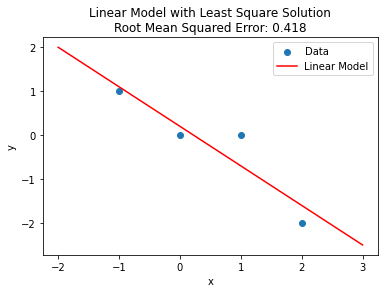

In [9]:
# AI usage: plotting is doen with copilot

# Calculate the predicted values
y_pred = c1[0] + c1[1] * data[:, 0]

# Calculate the root mean squared error
rmse = np.sqrt(np.mean((data[:, 1] - y_pred)**2))

# Plot the data points
plt.scatter(data[:, 0], data[:, 1], label='Data')

# Plot the linear model
x = np.linspace(-2, 3, 100)
y = c1[0] + c1[1] * x
plt.plot(x, y, color='red', label='Linear Model')

# Set labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title(f'Linear Model with Least Square Solution\nRoot Mean Squared Error: {rmse:.3g}')

# Show legend
plt.legend()

# Show the plot
plt.show()


In [14]:
# vector of unknowns (model 2)
n2 = 3
c2 = np.zeros(n2)

# matrix of least squares (model 2)
A2 = np.zeros((m, n2))
A2 = np.column_stack((ones, data[:, 0], data[:, 0]**2))

# Step 1: QR factorization
Q, R = qr_GS(A2)

# Step 2: Extract blocks
R_ = R[:n2, :n2]
d_ = (Q.T @ b)[:n2]

# Step 3: Solve the upper triangular system
c2 = np.linalg.solve(R_, d_)

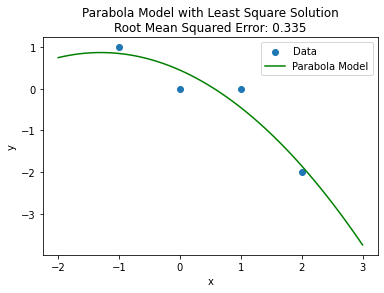

In [15]:
# AI usage: plotting is doen with copilot

# Calculate the predicted values
y_pred = c2[0] + c2[1] * data[:, 0] + c2[2] * data[:, 0]**2

# Calculate the root mean squared error
rmse = np.sqrt(np.mean((data[:, 1] - y_pred)**2))

# Plot the data points
plt.scatter(data[:, 0], data[:, 1], label='Data')

# Plot the parabola model
x = np.linspace(-2, 3, 100)
y = c2[0] + c2[1] * x + c2[2] * x**2
plt.plot(x, y, color='green', label='Parabola Model')

# Set labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title(f'Parabola Model with Least Square Solution\nRoot Mean Squared Error: {rmse:.3g}')

# Show legend
plt.legend()

# Show the plot
plt.show()


### Householder reflector

- Idea 1: If we have two vectors with the same length, we can find a reflection that sends one vector to the other. 
- Idea 2: Reflection can be expressed as orthogonal matrix.

**Remark**

- Idea 2 can be guessed from being invertible, length-preserving, and nice geometric meaning.

![Householder reflector](https://vzahorui.net/assets/images/linear_algebra/vector_reflection.png)

#### Preliminary

**Lemma** (Rhombus)

Assume that $x$ and $w$ are vectors of the same Euclidean length, $\|x\|_2=\|w\|_2$. Then $w-x$ and $w+x$ are perpendicular.


**Proof**

$$
(w-x)^T(w+x)=w^T w-x^T w+w^T x-x^T x=\|w\|^2-\|x\|^2=0.
$$


**Defintion** (Projection)

A map $P:\mathbb{R}^m \to \mathbb{R}^m$ is called *projection* if $P^2 = P$, that is, $P(Pv)=Pv$ for any $v\in\mathbb{R}^m$.

**Theorem** (Projection matrix)

For a matrix $A\in\mathbb{R}^{m\times n}$, 

$$
P=A\left(A^T A\right)^{-1} A^T
$$ 

defines the orthogonal projection from $\mathbb{R}^{m}$ onto column space of $A$. In particular, if $A=v$ (a single column), then 

$$
P=\frac{v v^T}{v^T v}
$$

defines the orthogonal projection from ${R}^{m}$ onto the line $\{\lambda v \ : \  \lambda \in \mathbb{R} \}$.

**Proof**

From the least square discussion, we already know that the vector $\bar{x} =\left(A^T A\right)^{-1} A^T b$ yields the projection of $b$ onto the column space of $A$. Thus, taking the linear combination of columns of $A$ with $\bar x$ being coefficients, we obtain the projected vector of $b$. In other words, the map given by 

$$
b \mapsto A\left(A^T A\right)^{-1} A^T b (=A\bar{x})
$$

defines a projection onto column space of $A$.

In particular, if $A$ consists of a single column $v$, then this reads 

$$
b \mapsto \frac{v v^T}{v^T v} b
$$




**Theorem** (Projection matrix) 

Let $V\in\mathbb{R}^{m\times n}$ be

$$
P=\frac{v v^T}{v^T v} .
$$

![Householder reflector](https://www.cs.utexas.edu/users/flame/laff/alaff-beta/images/Chapter03/reflector.png)

![Householder reflector](https://blogs.mathworks.com/cleve/files/house_blog_01.png)

### Appendix

#### Conditioning (No improvement observed)

**Remark** (Conditioning of least square)

- Solving least square problem using QR factorization shows better conditioning than normal equation.

**Note**

- The expected improvement was not observed.
  - A closer look revealed the results of QR decomposition of Matlab and our current algorithm are different after 8-th column.
  - This seems due to (a) different padding of columns, and (b) different QR algorithm.
  - Try again after Householder-QR algorithm is established.

**Example** (ill-conditioned least square problem revisited)

Let $x_0=2.0, x_2=2.2, x_3=2.4, \ldots, x_{10}=4.0$ be equally spaced points in $[2,4]$, and set $y_i=1+x_i+x_i^2+x_i^3+x_i^4+x_i^5+x_i^6+x_i^7$ for $0 \leq i \leq 10$. Use the normal equations to find the least squares polynomial $P(x)=c_1+c_2 x+\cdots+c_8 x^7$ fitting the $\left(x_i, y_i\right)$.

In [5]:
import numpy as np
from internallib import poly_eval

# problem parameters
# Suggestions: To check sanity, set n = 2, 3, 4, 
#   Things get wild soon after n = 5
n = 8       # number of unknowns

# right-hand side vector
x = np.linspace(2., 4., 11)
c_true = np.ones(n)
y = poly_eval(c_true, x)

# matrix
pow = np.arange(n)
# A = x[:, np.newaxis] ** pow       # broadcasting in effect
A = x.reshape(-1, 1) ** pow         # equivalent to the previous line

# Step 1: QR factorization
Q, R = np.linalg.qr(A)

# Step 2: Extract blocks
R_ = R[:n, :n]
d_ = (Q.T @ y)[:n]

# Step 3: Solve the upper triangular system
c = np.linalg.solve(R_, d_)

In [6]:
print(f"{'c_true':<10}{': '}{c_true}")
print(f"{'c':<10}{': '}{c}")
print(f"{'y':<10}{': '}{y}")
print(f"{'x':<10}{': '}{x}")


c_true    : [1. 1. 1. 1. 1. 1. 1. 1.]
c         : [1.00000015 0.99999964 1.00000038 0.99999978 1.00000007 0.99999998
 1.         1.        ]
y         : [  255.          456.4656128   785.5379584  1304.5441536  2098.3444352
  3280.         4997.3255808  7440.3912704 10850.0381056 15527.4719232
 21845.       ]
x         : [2.  2.2 2.4 2.6 2.8 3.  3.2 3.4 3.6 3.8 4. ]


### What to be careful of?

---
This work is licensed under [Creative Commons Attribution-ShareAlike 4.0 International](https://creativecommons.org/licenses/by-sa/4.0/)